<a href="https://colab.research.google.com/github/jayshivankar/Linear-Regression/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Dataset - https://drive.google.com/file/d/1HqTcjEjTTb9-4o6RezlY3BHwHFeQdbn9/view?usp=sharing

In [ ]:
# Libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score

# linear regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data import
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/Housing.csv')

# data sample
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# dimensions
data.shape

(545, 13)

In [ ]:
# null value check
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# data type
data.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
# data duplicate
data[data.duplicated()].shape[0]

0

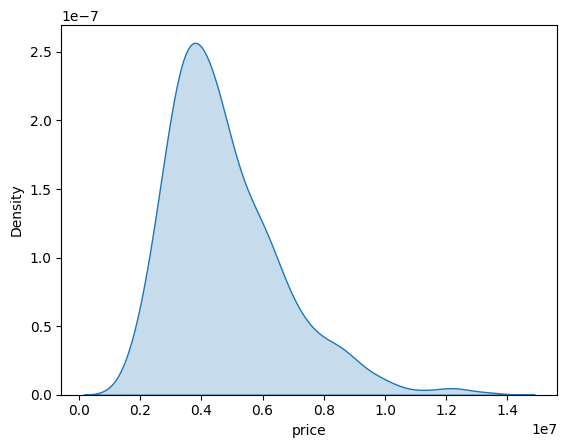

In [ ]:
# analyse the target column
sns.kdeplot(data['price'], fill=True)
plt.show()


# we can apply box-cox transformation to covert the right skewed data to normal distributed data

In [ ]:
# train-test split >> encoding >> scaling >> fit (sm.regression) >> p-value >> VIF >> final model >> testing  >> metrics

In [ ]:
# understanding the categorical columns
for cols in data.columns:
    if data[cols].dtype == 'O':
        print(cols, data[cols].unique())

mainroad ['yes' 'no']
guestroom ['no' 'yes']
basement ['no' 'yes']
hotwaterheating ['no' 'yes']
airconditioning ['yes' 'no']
prefarea ['yes' 'no']
furnishingstatus ['furnished' 'semi-furnished' 'unfurnished']


In [ ]:
# encoding the data
edata = pd.get_dummies(data, drop_first=True, dtype='int')
edata.columns = edata.columns.str.replace('_yes', '')
edata.columns = edata.columns.str.replace('furnishingstatus_', '')
edata.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [ ]:
# dependency split
x = edata.iloc[:, 1:]
y = edata[['price']]

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# data scaling
cols = ['area', 'bedrooms',	'bathrooms', 'stories', 'parking']

scaler = MinMaxScaler()    # to keep the values positive between 0-1
x_train[cols] = scaler.fit_transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

scale_t = MinMaxScaler()
y_train = scale_t.fit_transform(y_train)
y_test = scale_t.transform(y_test)

# training sample after scaling
x_train.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished
46,0.298969,0.4,0.333333,1.000000,0.333333,1,0,0,0,1,0,0,0
93,0.381443,0.4,0.333333,0.000000,1.000000,1,0,1,0,1,0,1,0
335,0.148866,0.2,0.000000,0.000000,0.666667,1,0,1,0,1,0,0,0
412,0.065979,0.4,0.000000,0.333333,0.000000,1,0,1,0,0,1,0,1
471,0.144330,0.4,0.000000,0.333333,0.000000,1,0,0,0,0,0,0,1


# Model Building

In [ ]:
# Simple Linear Regression

    # y = mx + c
    # price = m*(area) + c

# multiple linear regression

    # y = MnXn + C
    # price = M1*(area) + M2*(bedrooms) + M3*(bathrooms) + . . . + C

In [ ]:
# Simple linear model for area

# add constant
lr_data = sm.add_constant(x_train['area'])

# fit the data onto the ols model
lr_model = sm.OLS(y_train, lr_data).fit()

# model params
print(lr_model.params)

# price = 0.589940*(area) + 0.139496

const    0.139496
area     0.589940
dtype: float64


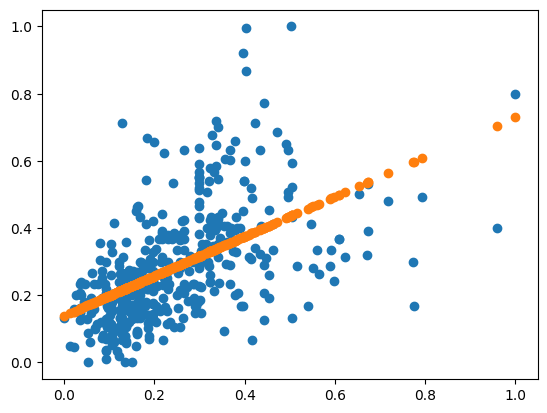

In [ ]:
# scatter plot
plt.scatter(x_train['area'], y_train)
plt.scatter(x_train['area'],  0.589940*(x_train['area'])+0.139496)
plt.show()

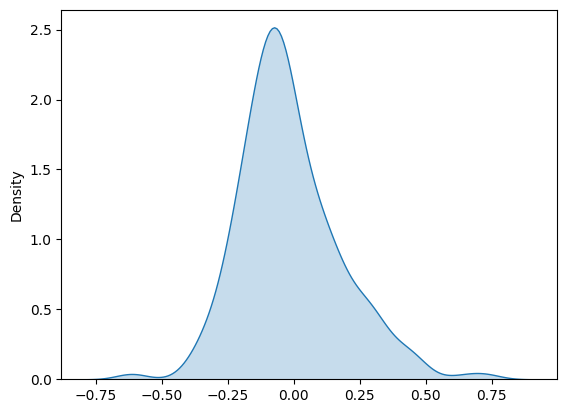

In [ ]:
# residual analysis
y_train_pred = lr_model.predict(lr_data)
res = pd.Series(y_train.ravel()) - y_train_pred

# kde plot
sns.kdeplot(res, fill=True)
plt.show()

In [ ]:
# array reshape
y_train  = y_train.reshape(436, )

In [ ]:
# R-Square : (1-(RSS/TSS))

RSS = ((y_train - y_train_pred)**2).sum()
TSS = ((y_train - y_train.mean())**2).sum()
r_square = 1-(RSS/TSS)
print(round(r_square*100, 2))

28.5


In [ ]:
# model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     173.0
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           1.75e-33
Time:                        16:16:43   Log-Likelihood:                 234.19
No. Observations:                 436   AIC:                            -464.4
Df Residuals:                     434   BIC:                            -456.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1395      0.013     10.933      0.0

In [ ]:
# Multiple linear regression

# add constant
lr_data = sm.add_constant(x_train[['area', 'bedrooms']])

# fit the data onto the ols model
lr_model = sm.OLS(y_train, lr_data).fit()

# model params
print(lr_model.params)

# price = 0.539356*(area) + 0.331276*(bedrroms) + 0.021904

const       0.021904
area        0.539356
bedrooms    0.331276
dtype: float64


In [ ]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     127.4
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           3.10e-44
Time:                        16:23:59   Log-Likelihood:                 261.94
No. Observations:                 436   AIC:                            -517.9
Df Residuals:                     433   BIC:                            -505.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0219      0.019      1.125      0.2

In [ ]:
# Multiple linear regression

# add constant
lr_data = sm.add_constant(x_train[['area', 'bedrooms', 'bathrooms']])

# fit the data onto the ols model
lr_model = sm.OLS(y_train, lr_data).fit()

# model params
print(lr_model.params)

# price =  0.478718*(area) + 0.171523*(bedrroms) + 0.406377(bathrooms) + 0.063050

const        0.063050
area         0.478718
bedrooms     0.171523
bathrooms    0.406377
dtype: float64


In [ ]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     140.5
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           1.57e-63
Time:                        16:24:14   Log-Likelihood:                 309.50
No. Observations:                 436   AIC:                            -611.0
Df Residuals:                     432   BIC:                            -594.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0630      0.018      3.517      0.0

In [ ]:
# ALL AT ONCE -

# add constant
mlr_data = sm.add_constant(x_train)

# fit the data onto the ols model
mlr_model = sm.OLS(y_train, mlr_data).fit()

# model summary
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.90
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           2.16e-97
Time:                        16:25:26   Log-Likelihood:                 413.55
No. Observations:                 436   AIC:                            -799.1
Df Residuals:                     422   BIC:                            -742.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0455      0.021     

In [ ]:
# the model is statistically significant but few cols are not
    # reason is that it may have multicollinearity (high correlation between independent features)
    # using VIF (variance inflation factor) we can fix the insignificance
    # VIF Method - VIF > 5 is bad (highly correlated)

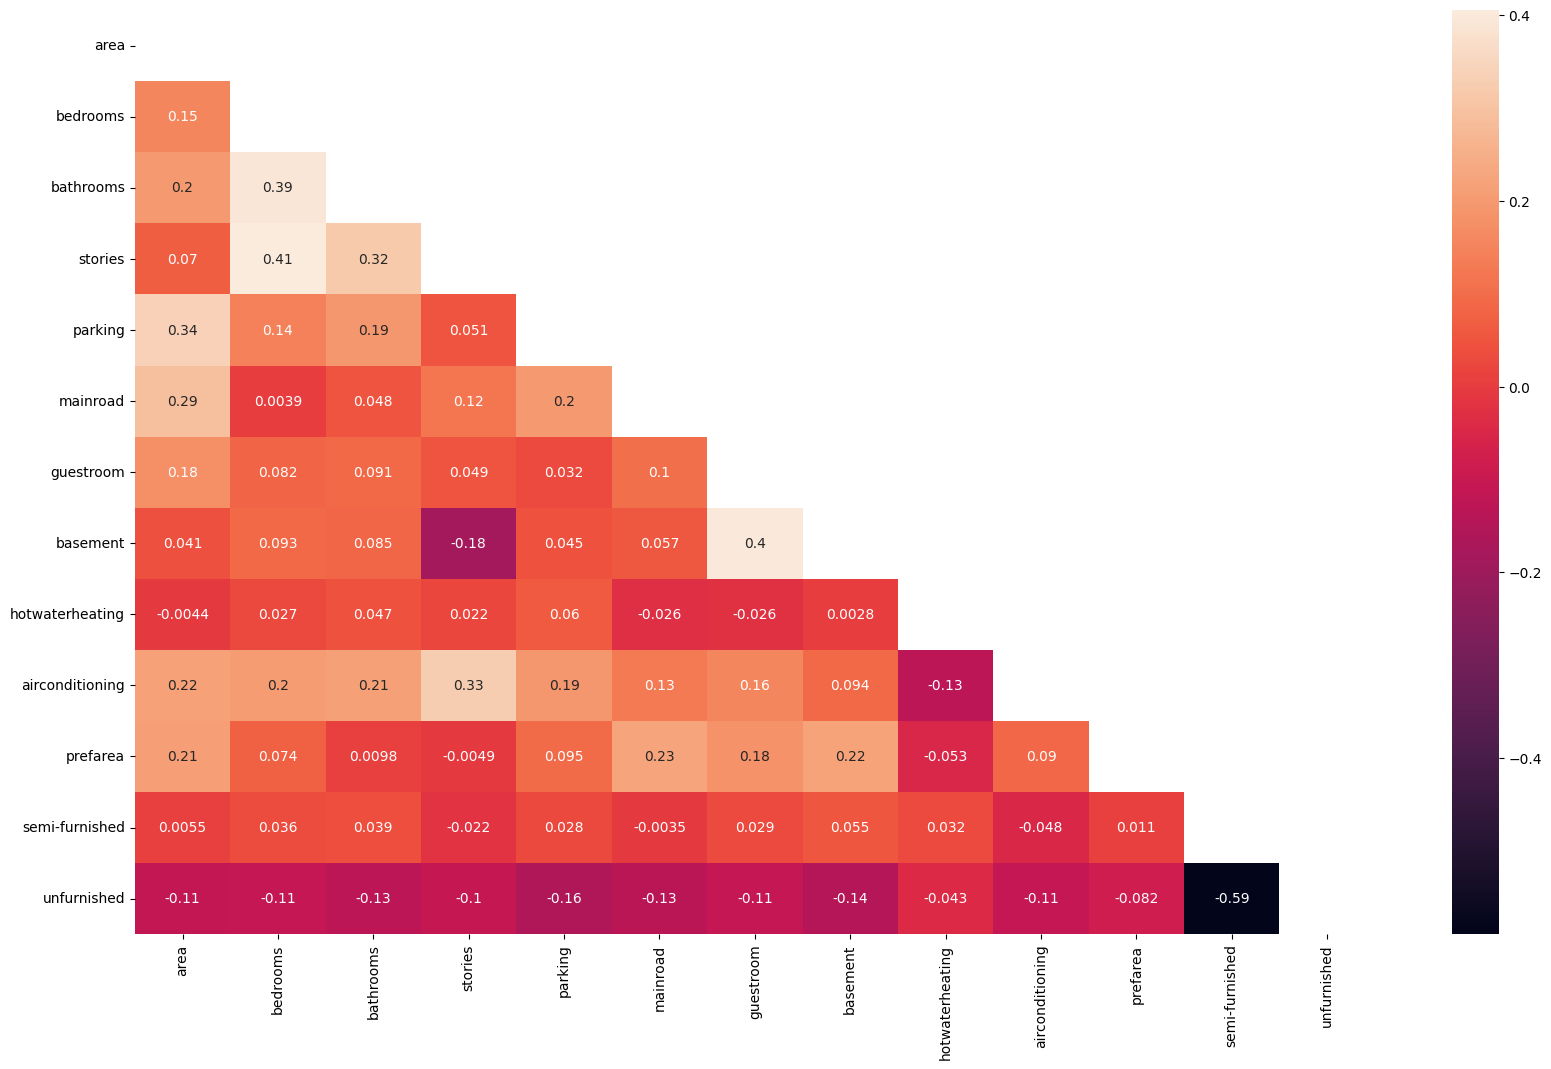

In [ ]:
# heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(x_train.corr(), annot=True, mask=np.triu(x_train.corr()))
plt.show()

In [ ]:
# droping the 'semi-furnished' as the value of p>0.05
x_tr = x_train.drop(['semi-furnished'], axis=1)

In [ ]:
# refitting the data
# add constant
mlr_data_2 = sm.add_constant(x_tr)

# fit the data onto the ols model
mlr_model_2 = sm.OLS(y_train, mlr_data_2).fit()

# model summary
print(mlr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     76.70
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           4.11e-98
Time:                        16:39:57   Log-Likelihood:                 412.99
No. Observations:                 436   AIC:                            -800.0
Df Residuals:                     423   BIC:                            -747.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0362      0.019     

In [ ]:
# droping the 'guestroom' as the value of p>0.05
x_tr = x_tr.drop(['guestroom'], axis=1)

In [ ]:
# refitting the data
# add constant
mlr_data_3 = sm.add_constant(x_tr)

# fit the data onto the ols model
mlr_model_3 = sm.OLS(y_train, mlr_data_3).fit()

# model summary
print(mlr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     83.09
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           1.68e-98
Time:                        16:40:00   Log-Likelihood:                 411.60
No. Observations:                 436   AIC:                            -799.2
Df Residuals:                     424   BIC:                            -750.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0352      0.019     

In [ ]:
# dataframe with column name and respective vif

vif_df = pd.DataFrame()
vif_df['Feature'] = x_tr.columns
vif_df['VIF'] = [round(vif(x_tr.values, i), 2) for i in range(x_tr.shape[1])]
vif_df.sort_values(by='VIF', ascending=False, inplace=True)
vif_df

,Feature,VIF
1,bedrooms,6.80
5,mainroad,5.64
0,area,4.41
3,stories,2.74
4,parking,1.98
8,airconditioning,1.81
6,basement,1.81
2,bathrooms,1.66
9,prefarea,1.48
10,unfurnished,1.41


In [ ]:
# droping the bedroom based on vif
x_tr = x_tr.drop(['bedrooms'], axis=1)

In [ ]:
# refitting the data
# add constant
mlr_data_4 = sm.add_constant(x_tr)

# fit the data onto the ols model
mlr_model_4 = sm.OLS(y_train, mlr_data_4).fit()

# model summary
print(mlr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     91.34
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           2.66e-99
Time:                        16:42:27   Log-Likelihood:                 411.14
No. Observations:                 436   AIC:                            -800.3
Df Residuals:                     425   BIC:                            -755.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0460      0.015     

In [ ]:
# dataframe with column name and respective vif

vif_df = pd.DataFrame()
vif_df['Feature'] = x_tr.columns
vif_df['VIF'] = [round(vif(x_tr.values, i), 2) for i in range(x_tr.shape[1])]
vif_df.sort_values(by='VIF', ascending=False, inplace=True)
vif_df

,Feature,VIF
4,mainroad,4.91
0,area,4.17
2,stories,2.29
3,parking,1.97
7,airconditioning,1.81
5,basement,1.67
1,bathrooms,1.59
8,prefarea,1.48
9,unfurnished,1.32
6,hotwaterheating,1.08


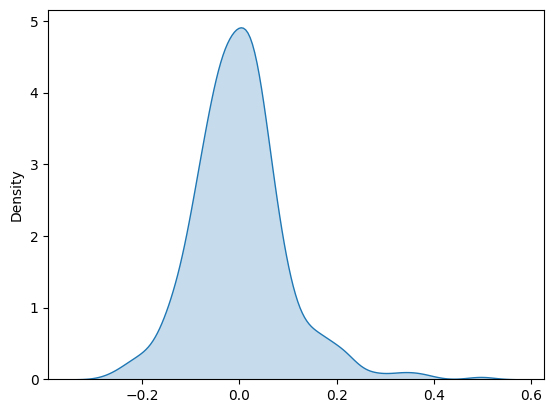

In [ ]:
# residual analysis
y_train_pred = mlr_model_4.predict(mlr_data_4)
res = y_train - y_train_pred

# kde plot
sns.kdeplot(res, fill=True)
plt.show()

In [ ]:
# test prediction

# add constant
x_test_m4_data = sm.add_constant(x_test)

# drop the data that are removed in training
x_test_m4_data.drop(['semi-furnished', 'guestroom', 'bedrooms'], axis=1, inplace=True)

# prediction on the data
y_pred_m4 = mlr_model_4.predict(x_test_m4_data)

In [ ]:
# model metrics
print('Testing Accuracy:', round(r2_score(y_test, y_pred_m4)*100,2), '%')

Testing Accuracy: 64.8 %
